In [3]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

## Latencia

En este apartado se grafican los resultados intentando obtener la menor latencia posible con tasas despreciables para cada pipeline de cada framework

In [4]:
# variables definition

files_path = "D:/resultados_memoria/latencia"
pipelines = ["iot", "log", "twitter"]
frameworks = ["AB", "AF", "KS", "AS"]
to_graph = {
    "iot": [], # list of tuples: (framework_name (str), list_final_latency)
    "log": [],
    "twitter": []
}
# parse raw data from csv

pathlist = Path(files_path)
for path in pathlist.iterdir():
    for pipeline in pipelines:
        if pipeline in str(path):
            framework = re.sub("_", "", str(re.findall(r"_\w+_", str(path))[0]))
            df = pd.read_csv(str(path)+f"/{pipeline}_timestamps_result.csv", sep= ";")
            latency_list = df['final_latency'].tolist()
            if len(latency_list) > 120:
                latency_list = latency_list[0:120]
            t = (framework, latency_list)
            to_graph[pipeline].append(t)
            
# graph the data in to_graph
def graph_latency_data(spark_only=False):
    for key in to_graph:
        fig, ax = plt.subplots()
        ax.set_xticklabels([])
        plt.title(f'Pipeline {key.capitalize()}')
        plt.ylabel('Latencia (ms)')
        plt.xlabel('Tiempo')
        for tple in to_graph[key]:
            framework_name, latency_list = tple
            if spark_only:
                if framework_name == "KS" or framework_name == "AB" or framework_name == "AF": continue
            else:
                if framework_name == "AS": continue
            time = range(0, len(latency_list))
            ax.plot(time, latency_list, label=framework_name)
            ax.legend()
        plt.show()
        
#graph_latency_data(spark_only=True)

## Métricas

Latencia promedio de cada pipeline para la medición de latencia y de tasa de transferencia

In [5]:
folders = ["latencia", "tasa"]
files_path = "D:/resultados_memoria/"
pipelines = ["iot", "log", "twitter"]

for folder in folders:
    pathlist = Path(f'{files_path}/{folder}')
    for path in pathlist.iterdir():
        filename = glob.glob(str(path) + "/*_timestamps_result.csv")
        df = pd.read_csv(filename[0], sep= ";")
        latency_list = df['final_latency'].tolist()
        avg_latency = round(sum(latency_list) / float(len(latency_list)), 2)
        median = np.median(latency_list)
        framework_name = str(path).split("_")[2]
        pipeline_name = str(path).split("_")[1].split("\\")[2]
        print(f"Pipeline: {pipeline_name}\nFramework: {framework_name}\nMediana Latencia: {median} ms\nLatencia Promedio: {avg_latency} ms\nMedición: {folder.capitalize()}\n----------")

Pipeline: iot
Framework: AB
Mediana Latencia: 211.5 ms
Latencia Promedio: 361.31 ms
Medición: Latencia
----------
Pipeline: iot
Framework: AF
Mediana Latencia: 8665.0 ms
Latencia Promedio: 8810.04 ms
Medición: Latencia
----------
Pipeline: iot
Framework: AS
Mediana Latencia: 354086.75 ms
Latencia Promedio: 388036.0 ms
Medición: Latencia
----------
Pipeline: iot
Framework: KS
Mediana Latencia: 807.0 ms
Latencia Promedio: 835.13 ms
Medición: Latencia
----------
Pipeline: log
Framework: AB
Mediana Latencia: 1105.25 ms
Latencia Promedio: 1206.39 ms
Medición: Latencia
----------
Pipeline: log
Framework: AF
Mediana Latencia: 491.5 ms
Latencia Promedio: 446.63 ms
Medición: Latencia
----------
Pipeline: log
Framework: AS
Mediana Latencia: 21890.5 ms
Latencia Promedio: 53980.15 ms
Medición: Latencia
----------
Pipeline: log
Framework: KS
Mediana Latencia: 690.5 ms
Latencia Promedio: 549.66 ms
Medición: Latencia
----------
Pipeline: twitter
Framework: AB
Mediana Latencia: 494.5 ms
Latencia Prome

## Uso de CPU

A continuación se graficará el % de uso de CPU para las pruebas de latencia (menor latencia posible) y tasa de transferencia (mayor tasa alcanzable) durante la ejecución de la prueba correspondiente

latencia
Pipeline Iot
Mediana para AB: 4.01 %
Mediana para AF: 1.47 %
Mediana para AS: 4.43 %
Mediana para KS: 0.28 %
Pipeline Log
Mediana para AB: 3.42 %
Mediana para AF: 0.34 %
Mediana para AS: 1.28 %
Mediana para KS: 0.25 %
Pipeline Twitter
Mediana para AB: 6.77 %
Mediana para AF: 1.54 %
Mediana para AS: 12.08 %
Mediana para KS: 1.15 %


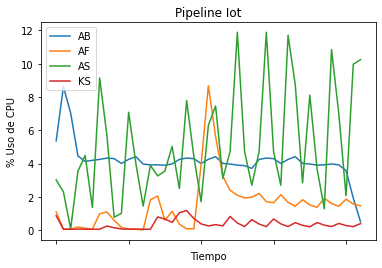

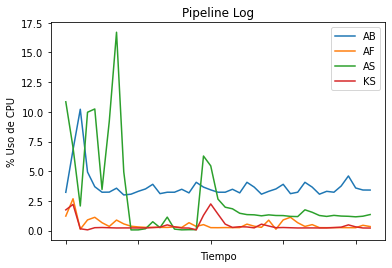

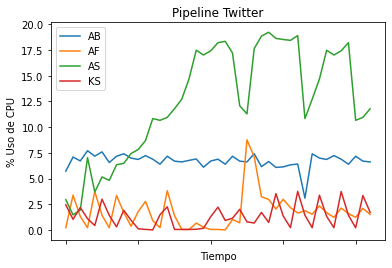



--------------


tasa
Pipeline Iot
Mediana para AB: 26.6 %
Mediana para AF: 6.4 %
Mediana para AS: 1.43 %
Mediana para KS: 19.61 %
Pipeline Log
Mediana para AB: 11.67 %
Mediana para AF: 0.17 %
Mediana para AS: 1.52 %
Mediana para KS: 7.93 %
Pipeline Twitter
Mediana para AB: 16.71 %
Mediana para AF: 6.03 %
Mediana para AS: 1.43 %
Mediana para KS: 2.59 %


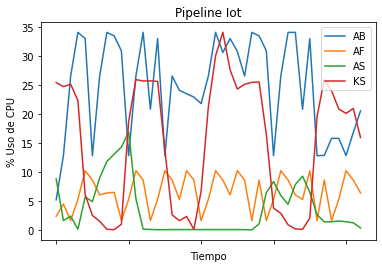

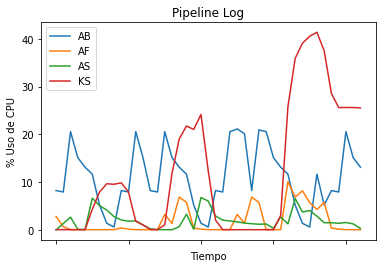

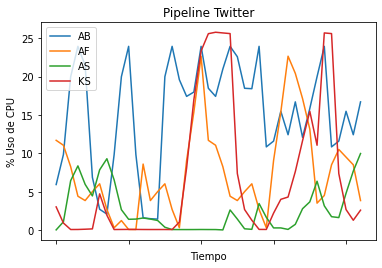



--------------




In [6]:
# exclude non float values from data downloaded from google cloud
def clean_list(cpu_vals):
    new_list = []
    for val in cpu_vals:
        new_val = 0
        try:
            new_val = float(val)
            if new_val > 1: continue
        except:
            #print("valor no se pudo convertir a flotante, saltando")
            continue
        new_list.append(new_val*100)
    return new_list

# graph the data in to_graph
def graph_cpu_ussage():
    for folder in folders:
        print(folder)
        for pipeline in pipelines:
            fig, ax = plt.subplots()
            ax.set_xticklabels([])
            plt.title(f'Pipeline {pipeline.capitalize()}')
            print(f'Pipeline {pipeline.capitalize()}')
            plt.ylabel('% Uso de CPU')
            plt.xlabel('Tiempo')
            for tple in to_graph[folder]:
                fm_path, cpu_values = tple
                cpu_values = cpu_values[0:43]
                if pipeline in fm_path:
                    #print(fm_path)
                    fm_name = fm_path.split("_")[2]
                    time = range(0, len(cpu_values))
                    print(f'Mediana para {fm_name}: {round(np.median(cpu_values),2)} %')
                    ax.plot(time, cpu_values, label=fm_name)
                    ax.legend()
        plt.show()
        print("\n")
        print("--------------")
        print("\n")
        
####

folders = ["latencia", "tasa"]
pipelines = ["iot", "log", "twitter"]
to_graph = {
    "latencia": [], # list of tuples: (csv_path, cpu_values_list)
    "tasa": [],
}

for folder in folders:
    path = f"D:/resultados_memoria/{folder}"
    pathlist = Path(path)
    for fm_path in pathlist.iterdir():
        csv_path = f"{str(fm_path)}/Uso_de_CPU.csv"
        df = pd.read_csv(csv_path)
        cpu_vals_list = clean_list(df[df.columns[1]].tolist())
        to_graph[folder].append((csv_path, cpu_vals_list))
        
graph_cpu_ussage()
    
    

## Uso de memoria

Los siguientes gráficos muestran el % de uso de la memoria durante la ejecución del pipeline

latencia
Pipeline Iot
Mediana para AB: 17.3 %
Mediana para AF: 11.79 %
Mediana para AS: 16.33 %
Mediana para KS: 2.5 %
Pipeline Log
Mediana para AB: 12.89 %
Mediana para AF: 2.21 %
Mediana para AS: 5.24 %
Mediana para KS: 2.17 %
Pipeline Twitter
Mediana para AB: 30.88 %
Mediana para AF: 4.3 %
Mediana para AS: 5.9 %
Mediana para KS: 3.2 %


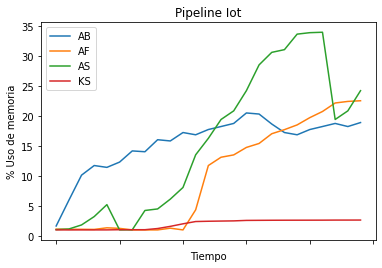

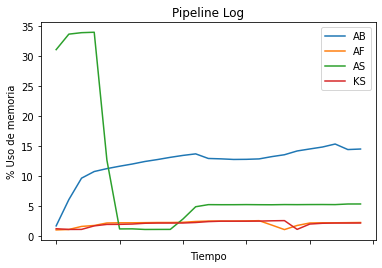

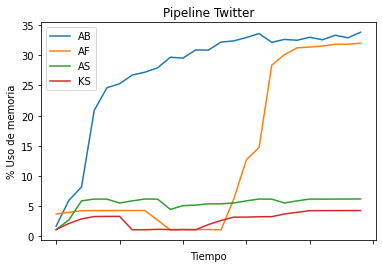



--------------


tasa
Pipeline Iot
Mediana para AB: 34.17 %
Mediana para AF: 14.71 %
Mediana para AS: 0.62 %
Mediana para KS: 1.54 %
Pipeline Log
Mediana para AB: 16.77 %
Mediana para AF: 14.61 %
Mediana para AS: 1.93 %
Mediana para KS: 1.7 %
Pipeline Twitter
Mediana para AB: 28.12 %
Mediana para AF: 15.32 %
Mediana para AS: 0.85 %
Mediana para KS: 1.15 %


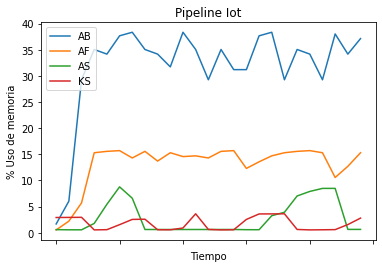

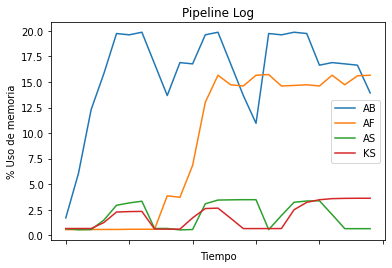

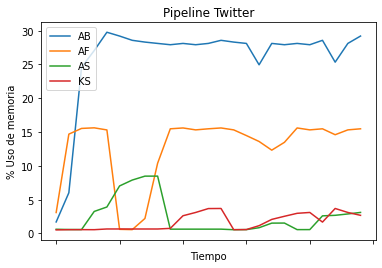



--------------




In [7]:
folders = ["latencia", "tasa"]
pipelines = ["iot", "log", "twitter"]
to_graph = {
    "latencia": [], # list of tuples: (csv_path, ram_values_list)
    "tasa": [],
}

# graph the data in to_graph
def graph_ram_ussage():
    for folder in folders:
        print(folder)
        for pipeline in pipelines:
            fig, ax = plt.subplots()
            ax.set_xticklabels([])
            plt.title(f'Pipeline {pipeline.capitalize()}')
            print(f'Pipeline {pipeline.capitalize()}')
            plt.ylabel('% Uso de memoria')
            plt.xlabel('Tiempo')
            for tple in to_graph[folder]:
                fm_path, ram_values = tple
                if pipeline in fm_path:
                    #print(ram_values)
                    fm_name = fm_path.split("_")[2]
                    time = range(0, len(ram_values))
                    ax.plot(time, ram_values, label=fm_name)
                    print(f'Mediana para {fm_name}: {round(np.median(ram_values),2)} %')
                    ax.legend()
        plt.show()
        print("\n")
        print("--------------")
        print("\n")
    
for folder in folders:
    path = f"D:/resultados_memoria/{folder}"
    pathlist = Path(path)
    for fm_path in pathlist.iterdir():
        #print(str(fm_path))
        ram_vals_list = []
        if "AB" in str(fm_path):
            df1 = pd.read_csv(f"{str(fm_path)}/Uso_de_memoria_(bytes/s_estimados)_1.csv")[2:]
            df2 = pd.read_csv(f"{str(fm_path)}/Uso_de_memoria_(bytes/s_estimados)_2.csv")[2:]
            memory_used = df1[df1.columns[1]].tolist()
            total_memory = df2[df2.columns[1]].tolist()
            for v1, v2 in zip(memory_used, total_memory): ram_vals_list.append(100*(int(v1)/int(v2)))
            #print(ram_vals_list)
        else:
            csv_path = f"{str(fm_path)}/Uso_de_memoria.csv"
            df = pd.read_csv(csv_path)
            ram_vals_list = df[df.columns[1]].tolist()[4:]
            ram_vals_list = list(map(float, ram_vals_list))
            #print(ram_vals_list)
        to_graph[folder].append((str(fm_path), ram_vals_list[0:25]))
        
        
graph_ram_ussage()